In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    
    closed_form_sol = np.dot(np.dot(np.linalg.inv(np.dot(tx.T,tx)),tx.T),y)
    
    return closed_form_sol

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    y = y.reshape((-1,1))
    w_opt = least_squares(y,tx)    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    return w_opt

Test it here

In [4]:
test_your_least_squares()

array([[73.293922  ],
       [13.47971243]])

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [5]:
# load dataset
x, y = load_data()
y = y.reshape((-1,1))
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50, 1)


In [6]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    
    poly_matrix = []
    for i in range(1,degree+1):
        poly_matrix.append(np.power(x,i))
    
    poly_matrix = np.asarray(poly_matrix)
    return poly_matrix.T

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [8]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    
    error_term = np.subtract(y,np.dot(tx,w))
    loss = np.dot(error_term.T,error_term)
    loss = loss/(2 * tx.shape[0])
    return loss[0][0]

In [9]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        data = build_poly(x,degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        w_optimal = least_squares(y,data)
        cost = compute_loss(y,data,w_optimal)
        rmse = np.sqrt(2 * cost) 
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, w_optimal, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.627390495765
Processing 2th experiment, degree=3, rmse=0.260041705539
Processing 3th experiment, degree=7, rmse=0.251743419091
Processing 4th experiment, degree=12, rmse=0.2874260397


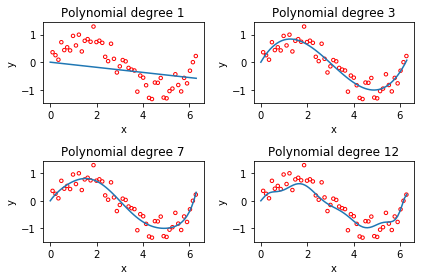

In [10]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [11]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    rows = range(0,x.shape[0])
    np.random.shuffle(rows)
    train_len = int(ratio * len(rows))
    train_indices,test_indices = rows[0:train_len],rows[train_len:]
    train_data,train_target = x[train_indices],y[train_indices]
    test_data,test_target = x[test_indices],y[test_indices]
    
    return train_data,train_target,test_data,test_target

Then, test your `split_data` function below.

In [12]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    train_data,train_target,test_data,test_target = split_data(x,y,ratio,seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    train_poly,test_poly = build_poly(train_data,degree),build_poly(test_data,degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    w_opt_train = least_squares(train_target,train_poly)
    w_opt_test = least_squares(test_target,test_poly)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = np.sqrt(2 * compute_loss(train_target,train_poly,w_opt_train)) 
    rmse_te = np.sqrt(2 * compute_loss(test_target,test_poly,w_opt_test))

    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [13]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.650, Testing RMSE=0.354
proportion=0.9, degree=3, Training RMSE=0.266, Testing RMSE=0.102
proportion=0.9, degree=7, Training RMSE=0.256, Testing RMSE=0.291
proportion=0.9, degree=12, Training RMSE=0.326, Testing RMSE=3.635
proportion=0.5, degree=1, Training RMSE=0.699, Testing RMSE=0.540
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.259
proportion=0.5, degree=7, Training RMSE=0.234, Testing RMSE=0.248
proportion=0.5, degree=12, Training RMSE=0.266, Testing RMSE=0.239
proportion=0.1, degree=1, Training RMSE=0.569, Testing RMSE=0.620
proportion=0.1, degree=3, Training RMSE=0.112, Testing RMSE=0.254
proportion=0.1, degree=7, Training RMSE=0.925, Testing RMSE=0.247
proportion=0.1, degree=12, Training RMSE=0.230, Testing RMSE=0.276


# 3 Ridge Regression
Please fill in the function below.

In [50]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    aI = 2 * tx.shape[0] * lambda_ * np.identity(tx.shape[1])
    a = tx.T.dot(tx) + aI
    b = tx.T.dot(y)
    return np.linalg.solve(a, b)

In [51]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    train_data,train_target,test_data,test_target = split_data(x,y,ratio,seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    
    train_poly,test_poly = build_poly(train_data,degree),build_poly(test_data,degree)

    
    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        w_opt_train = ridge_regression2(train_target,train_poly,lambda_)
        
        rmse_tr.append(np.sqrt(2 * compute_loss(train_target,train_poly,w_opt_train))) 
        rmse_te.append(np.sqrt(2 * compute_loss(test_target,test_poly,w_opt_train)))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.339
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.338
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.336
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.333
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.325
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.229, Testing RMSE=0.311
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.232, Testing RMSE=0.292
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.239, Testing RMSE=0.273
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.248, Testing RMSE=0.265
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.257, Testing RMSE=0.271
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.269, Testing RMSE=0.294
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.288, Testing RMSE=0.336
proportion=0.5, degree=7, lambda=0.193, 

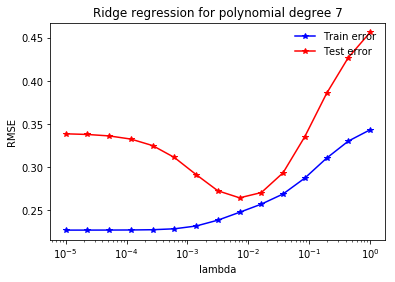

In [52]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)